In [17]:
import time
import matplotlib.pyplot as plt
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.layers import Activation
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
from keras_sequential_ascii import sequential_model_to_ascii_printout
from keras import backend as K
# Loading the CIFAR-10 datasets
from keras.datasets import cifar10

In [18]:
# Declare variables

batch_size = 32 # 32 examples in a mini-batch, smaller batch size means more updates in one epoch
num_classes = 10 #
epochs = 10 # repeat 200 times

In [19]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data() # x_train - training data(images), y_train - labels(digits)
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')


('x_train shape:', (50000, 32, 32, 3))
(50000, 'train samples')
(10000, 'test samples')


In [20]:
# Here are the classes in the dataset, as well as 10 random images from each

class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

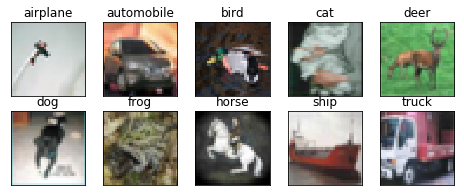

In [21]:
# Print figure with 10 random images from each

fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(y_train[:]==i)[0]
    features_idx = x_train[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num,::]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [22]:
# Convert and pre-processing

y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train  /= 255
x_test /= 255

In [23]:
# Define Model

def base_model():

    model = Sequential()
    model.add(Conv2D(32, (3, 3), padding='same', input_shape=x_train.shape[1:]))
    model.add(Activation('relu'))
    model.add(Conv2D(32,(3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(64, (3,3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(512))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes))
    model.add(Activation('softmax'))

    sgd = SGD(lr = 0.1, decay=1e-6, nesterov=True)
    # Train model

    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
    return model

In [24]:
cnn_n = base_model()
cnn_n.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_7 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_8 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 64)        18496     
__________

In [25]:
# Vizualizing model structure

sequential_model_to_ascii_printout(cnn_n)

           OPERATION           DATA DIMENSIONS   WEIGHTS(N)   WEIGHTS(%)

               Input   #####     32   32    3
              Conv2D    \|/  -------------------       896     0.0%
                relu   #####     32   32   32
              Conv2D    \|/  -------------------      9248     0.0%
                relu   #####     30   30   32
        MaxPooling2D   Y max -------------------         0     0.0%
                       #####     15   15   32
             Dropout    | || -------------------         0     0.0%
                       #####     15   15   32
              Conv2D    \|/  -------------------     18496     1.0%
                relu   #####     15   15   64
              Conv2D    \|/  -------------------     36928     2.0%
                relu   #####     13   13   64
        MaxPooling2D   Y max -------------------         0     0.0%
                       #####      6    6   64
             Dropout    | || -------------------         0     0.0%
              

In [ ]:
# Fit model

cnn = cnn_n.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test,y_test),shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 12s - loss: 2.0444 - acc: 0.2424 - val_loss: 1.6357 - val_acc: 0.4043
Epoch 2/10
50000/50000 [==============================] - 12s - loss: 1.5478 - acc: 0.4377 - val_loss: 1.3379 - val_acc: 0.5200
Epoch 3/10
50000/50000 [==============================] - 12s - loss: 1.3454 - acc: 0.5187 - val_loss: 1.6971 - val_acc: 0.4095
Epoch 4/10
50000/50000 [==============================] - 12s - loss: 1.2156 - acc: 0.5653 - val_loss: 1.0576 - val_acc: 0.6230
Epoch 5/10
50000/50000 [==============================] - 12s - loss: 1.1091 - acc: 0.6082 - val_loss: 0.9858 - val_acc: 0.6560
Epoch 6/10
50000/50000 [==============================] - 12s - loss: 1.0243 - acc: 0.6416 - val_loss: 0.9199 - val_acc: 0.6740
Epoch 7/10
50000/50000 [==============================] - 12s - loss: 0.9618 - acc: 0.6642 - val_loss: 0.8713 - val_acc: 0.6989
Epoch 8/10
50000/50000 [==============================

In [ ]:
# Plots for training and testing process: loss and accuracy

plt.figure(0)
plt.plot(cnn.history['acc'],'r')
plt.plot(cnn.history['val_acc'],'g')
plt.xticks(np.arange(0, 11, 2.0))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Accuracy")
plt.title("Training Accuracy vs Validation Accuracy")
plt.legend(['train','validation'])

plt.figure(1)
plt.plot(cnn.history['loss'],'r')
plt.plot(cnn.history['val_loss'],'g')
plt.xticks(np.arange(0, 11, 2.0))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Loss")
plt.title("Training Loss vs Validation Loss")
plt.legend(['train','validation'])
plt.show()

scores = cnn_n.evaluate(x_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

In [29]:
# Confusion matrix result

from sklearn.metrics import classification_report, confusion_matrix
Y_pred = cnn_n.predict(x_test, verbose=2)
y_pred = np.argmax(Y_pred, axis=1)

for ix in range(10):
    print(ix, confusion_matrix(np.argmax(y_test,axis=1),y_pred)[ix].sum())
cm = confusion_matrix(np.argmax(y_test,axis=1),y_pred)
print(cm)

(0, 1000)
(1, 1000)
(2, 1000)
(3, 1000)
(4, 1000)
(5, 1000)
(6, 1000)
(7, 1000)
(8, 1000)
(9, 1000)
[[767  22  34  25  21   7  16  10  69  29]
 [  6 921   3   8   4   0   7   4  21  26]
 [ 62   5 494  70  93  84 128  33  21  10]
 [ 18  14  36 492  59 186 126  33  23  13]
 [ 20   6  45  46 632  38 146  53  13   1]
 [  9  10  32 149  41 646  50  45   7  11]
 [  3   3  16  31  16  16 901   2  10   2]
 [  8   4  15  41  52  58  27 776   3  16]
 [ 58  29   8   8   7   0   7   5 860  18]
 [ 26 118   5  17   3   3   6   8  32 782]]


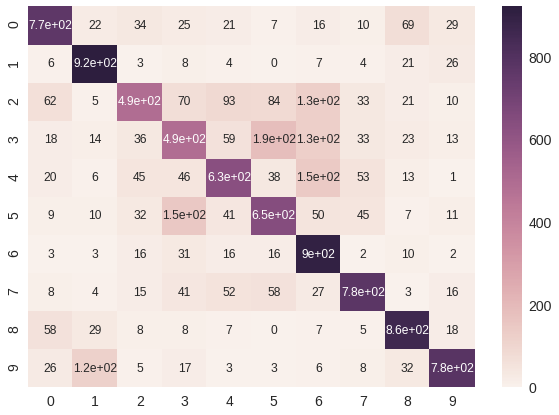

In [30]:
# Visualizing of confusion matrix
import seaborn as sn
import pandas  as pd


df_cm = pd.DataFrame(cm, range(10),
                  range(10))
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, annot=True,annot_kws={"size": 12})# font size
plt.show()